In [1]:
import pandas as pd
from pydataset import data
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

In [2]:
df=pd.read_csv(r"C:\Users\hb292\Downloads\winequality-red.csv")

In [3]:
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [15]:
df.shape

(1599, 12)

In [5]:
df['quality'].value_counts().sort_index()

quality
3     10
4     53
5    681
6    638
7    199
8     18
Name: count, dtype: int64

In [6]:
df.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7
9,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5


In [7]:
X = df[['fixed acidity','volatile acidity',	'citric acid','residual sugar','chlorides',	'free sulfur dioxide','total sulfur dioxide','density','pH','sulphates','alcohol']]
y = df['quality']

In [8]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

In [9]:
model = GaussianNB()
model.fit(X_train, y_train)

,priors,None
,var_smoothing,1e-09


In [10]:
pred = model.predict(X_test)
pred

array([5, 5, 6, 5, 6, 5, 5, 5, 6, 6, 7, 5, 6, 5, 5, 7, 5, 6, 7, 5, 5, 5,
       6, 6, 5, 6, 7, 6, 5, 7, 5, 6, 6, 5, 6, 5, 7, 6, 6, 6, 6, 5, 7, 5,
       6, 6, 7, 6, 5, 6, 5, 4, 6, 6, 5, 5, 6, 5, 6, 6, 5, 6, 6, 6, 7, 6,
       7, 6, 7, 5, 7, 5, 6, 6, 6, 5, 7, 5, 6, 7, 6, 7, 5, 6, 6, 7, 5, 6,
       7, 5, 6, 5, 6, 6, 5, 6, 5, 6, 5, 5, 5, 5, 6, 6, 5, 6, 6, 5, 6, 5,
       7, 5, 5, 5, 6, 6, 6, 6, 5, 6, 6, 5, 6, 5, 6, 5, 6, 6, 6, 6, 6, 5,
       5, 7, 6, 5, 5, 5, 5, 6, 7, 6, 6, 6, 6, 5, 6, 5, 6, 5, 6, 6, 5, 6,
       6, 6, 6, 6, 6, 6, 7, 5, 6, 5, 5, 6, 5, 5, 5, 5, 5, 5, 7, 5, 5, 6,
       6, 5, 5, 4, 5, 7, 5, 7, 5, 7, 5, 6, 7, 5, 5, 7, 6, 7, 6, 6, 5, 5,
       6, 6, 5, 5, 6, 5, 7, 6, 5, 6, 6, 5, 6, 5, 6, 6, 7, 6, 4, 5, 6, 5,
       5, 7, 7, 6, 4, 5, 5, 7, 5, 6, 5, 5, 7, 6, 7, 6, 5, 6, 5, 5, 6, 5,
       6, 7, 4, 6, 6, 5, 8, 5, 6, 6, 5, 5, 3, 5, 5, 6, 6, 7, 7, 6, 5, 7,
       6, 7, 5, 5, 7, 7, 5, 6, 5, 5, 6, 6, 5, 6, 7, 5, 7, 5, 5, 6, 5, 6,
       5, 6, 5, 4, 5, 7, 8, 5, 5, 7, 5, 7, 6, 7, 6,

In [12]:
cm = confusion_matrix(y_test, pred)
cm

array([[ 0,  0,  1,  0,  0,  0],
       [ 1,  1,  7,  1,  0,  0],
       [ 0,  1, 85, 41,  3,  0],
       [ 0,  4, 36, 69, 21,  2],
       [ 0,  0,  2, 19, 21,  0],
       [ 0,  0,  0,  1,  4,  0]])

<Figure size 1000x800 with 0 Axes>

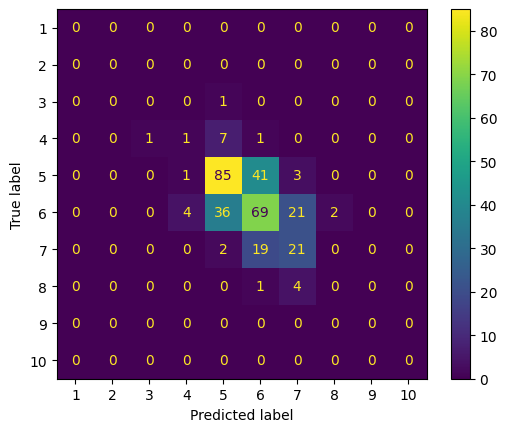

In [13]:
labels = [1,2,3,4,5,6,7,8,9,10]

cm = confusion_matrix(y_test, pred, labels=labels)
disp = ConfusionMatrixDisplay(cm, display_labels=labels)

plt.figure(figsize=(10,8))
disp.plot()
plt.show()


In [14]:
acc = accuracy_score(y_test, pred)
print(f"Accuracy: {acc:.3f}")

Accuracy: 0.550
